![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 1: kNN and Linear Regression

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 55

<hr style="height:2.4pt">

In [28]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [29]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

### Names of the people who worked on this homework together
#### Ojas Kulkarni
#### Alvin Vinod

In [ ]:
!pip install seaborn

In [31]:
# Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [133]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part A: k-NN and Linear Regression [30 points total] </h2>    <br />


### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, mileage, condition, etc.  
    
#### DATASET

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs),
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.




<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 1:   Exploratory Data Analysis (EDA) [10 points total]</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** [2pts] Which variables are quantitative, and which are categorical? 

**1.2** [2pts] What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** [2pts] What is the range of Kilometers that the cars have?

**1.4** [4pts] The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
**Note**: Label your axes.
</div>

## Solutions 

### 1.1

**Which variables are quantitative, and which are categorical?**

In [33]:
# your code here
df = pd.read_csv("data/car_dekho_full.csv")
df.head()

quantitative = ["Current_Selling_Price","MRP","Kms_Driven"]
print("Quantitative Variables:",', '.join(quantitative))

categorical = ["Year"]
print("Categorical Variables:",' '.join(categorical))

Quantitative Variables: Current_Selling_Price, MRP, Kms_Driven
Categorical Variables: Year


### 1.2

**What are the means and standard deviations for Current_Selling_Price and MRP?**

In [34]:
# Name your variables as mean_csp, mean_mrp, std_csp, std_mrp

# your code here
mean_csp = df.Current_Selling_Price.mean()
std_csp = df.Current_Selling_Price.std()

mean_mrp = df.MRP.mean()
std_mrp = df.MRP.std()
# end your code here 


print ("The mean Current Selling Price is", round(mean_csp,2),"lakhs")
print ("The mean MRP is", round(mean_mrp,2),'lakhs')
print ("The Standard Deviation of Current Selling Price is", round(std_csp,2))
print ("The Standard Deviation of MRP is", round(std_mrp,2))

The mean Current Selling Price is 4.39 lakhs
The mean MRP is 6.91 lakhs
The Standard Deviation of Current Selling Price is 4.52
The Standard Deviation of MRP is 6.48


### 1.3

**What is the range of Kilometers that the cars have?**

In [35]:
# your code here
range_km = max(df.Kms_Driven) - min(df.Kms_Driven)
print(f"The distance that the cars on cardekho.com have driven ranges from a \
minimum of {min(df.Kms_Driven)} kms to a maximum of {max(df.Kms_Driven)} kms,\
that is a \ntotal range of {range_km} kms")

The distance that the cars on cardekho.com have driven ranges from a minimum of 500 kms to a maximum of 213000 kms,that is a 
total range of 212500 kms


### 1.4

**The goal of this part is to identify the best variable from which to predict our respone variable Current Selling Price. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and Current_Selling_Price. Based on the plots, which is the predictor that visually seem to best predict the Current_Selling_Price?**

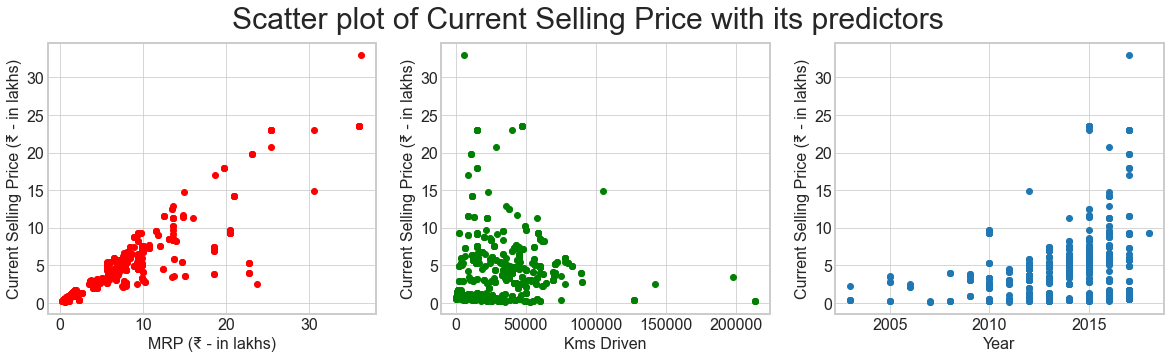

In [144]:
# your code here
fig, ax = plt.subplots(1,3,figsize=(20,5))
#---------plotting MRP vs Current Selling Price--------------
ax[0].scatter(df.MRP,df.Current_Selling_Price,color='r')
ax[0].set_xlabel("MRP (₹ - in lakhs)")
ax[0].set_ylabel("Current Selling Price (₹ - in lakhs)")

#---------plotting Kms Driven vs Current Selling Price-------
ax[1].scatter(df.Kms_Driven,df.Current_Selling_Price,color='g')
ax[1].set_xlabel("Kms Driven")
ax[1].set_ylabel("Current Selling Price (₹ - in lakhs)")

#---------plotting Year vs Current Selling Price-------------
ax[2].scatter(df.Year,df.Current_Selling_Price)
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Current Selling Price (₹ - in lakhs)")

fig.suptitle("Scatter plot of Current Selling Price with its predictors",fontsize=30)
plt.show()

**Your answer here**<br />
Visually, 'MRP' seems to be the best at predicting the 'Current selling price' values

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 2:   k-Nearest Neighbors  [10 points total]</b>
<br /><br />
We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.
<br /><br />

**2.1** [6pts] In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
<br /><br />
    
INSTRUCTIONS:
<br />
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
<br />
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,60,100$. 
<br />
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
<br />
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
<br />
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
<br />
- Find the best model based on the test $MSE$ values.
<br />
- Evaluate and report the $R^2$ of the best model.

<br /><br />
**2.2** [4pts] Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
<br /><br />
- How does the value of $k$ affect the fitted model?
<br />
- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
<br />
- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
<br />
    
    </div>

### Solutions

### 2.1
In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

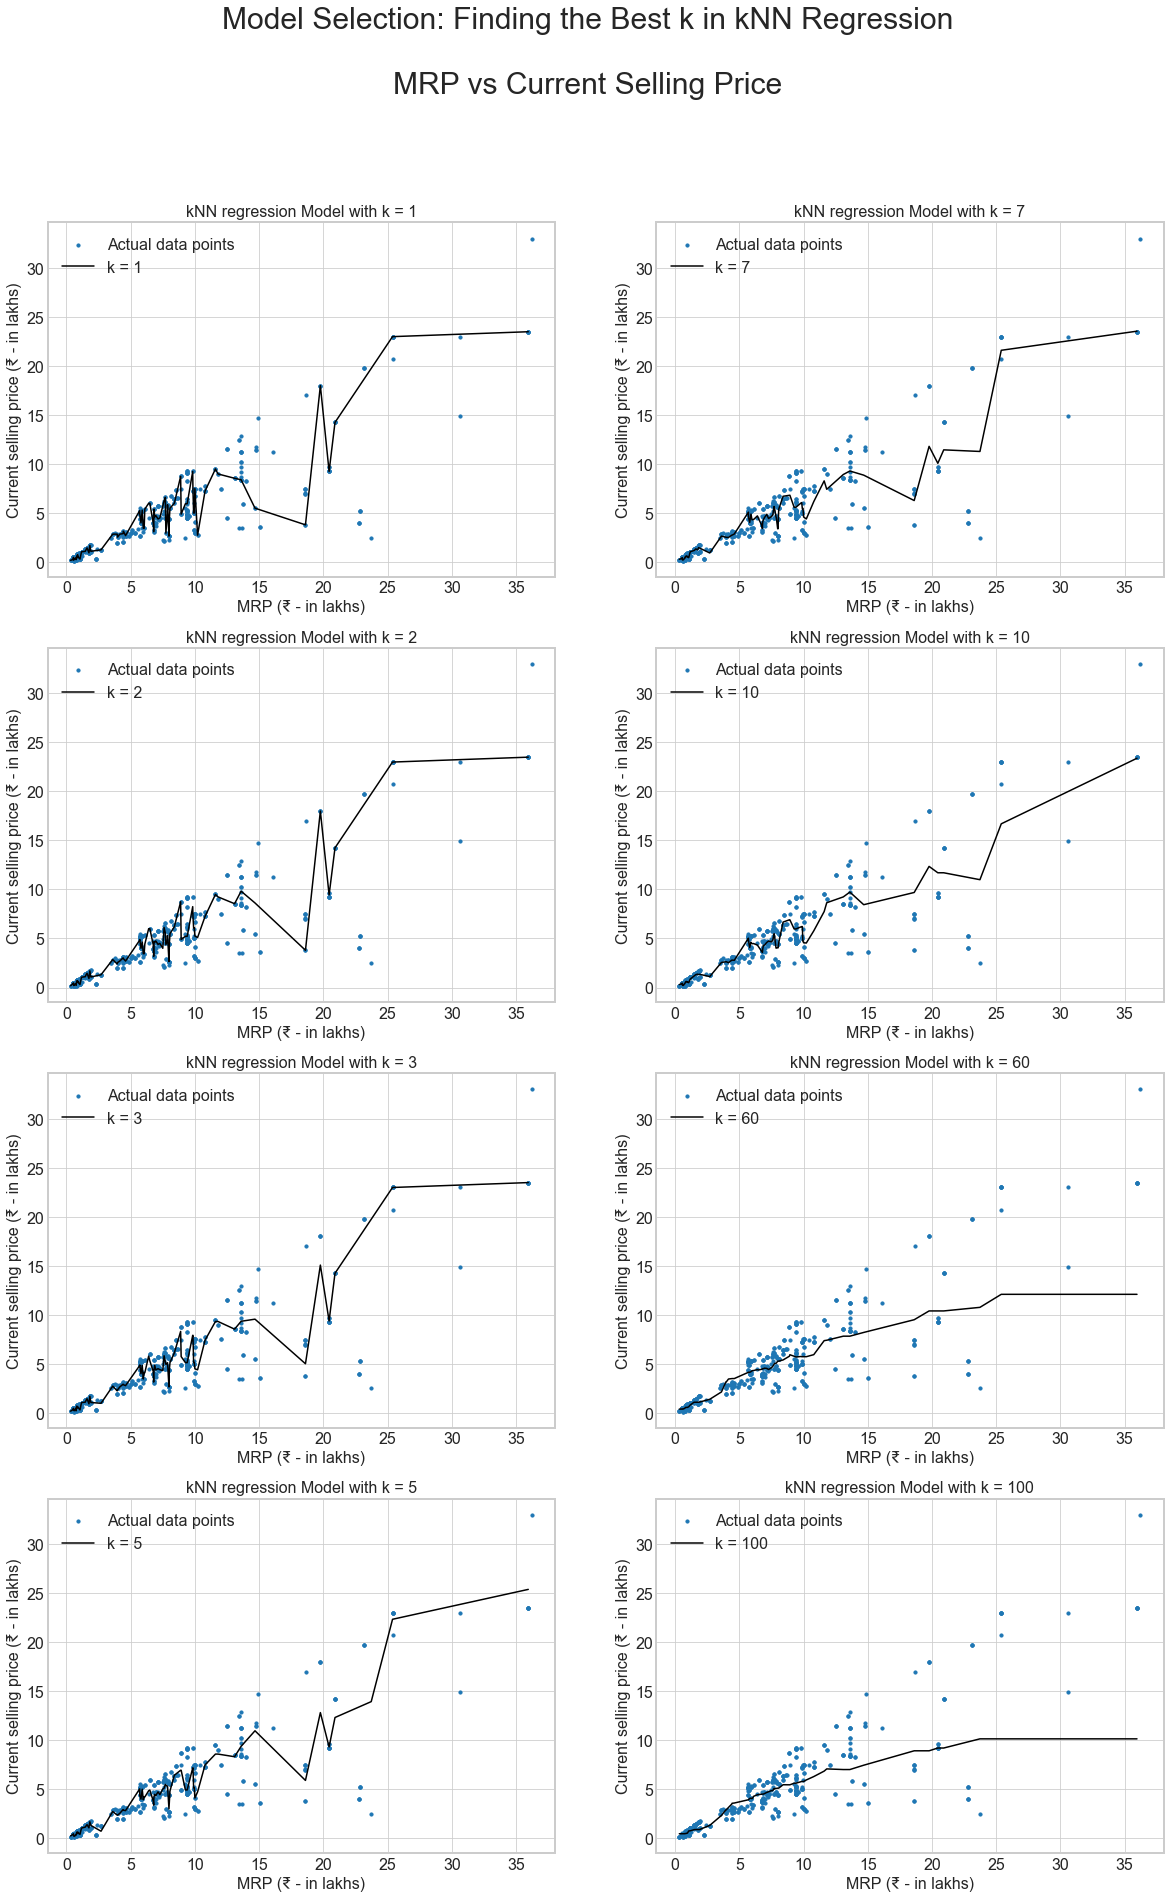

In [77]:
#Choosing your predictor and response variable 
# your code here 
x = df[['MRP']].values 
y = df['Current_Selling_Price'].values 
# end of your code here  
 

##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109 
# your code here 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state=109) 
# end of your code here   
 

## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,60,100 . 
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid.  
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend  
# your code here  

fig, axes = plt.subplots(4, 2, figsize=(20,30)) 
fig.suptitle('Model Selection: Finding the Best k in kNN Regression\n\nMRP vs Current Selling Price',fontsize=30) 
row=0 
col=0

# sorting the test data to plot kNN curve
idx = np.argsort(x_test[:,0]) 
x_test = x_test[idx] 
y_test = y_test[idx] 

# idx_train = np.argsort(x_train[:,0]) 
# x_train = x_train[idx_train] 
# y_train = y_train[idx_train] 

model_dict = {}
mse_dict_test = {} 
mse_dict_train = {} 
for i, k in enumerate([1,2,3,5,7,10,60,100]):  
    # fitting a kNN model for each k in the list
    knn_reg = KNeighborsRegressor(n_neighbors=k) 
    knn_reg.fit(x_train, y_train)  
 
    # getting predictions & calculating MSEs
    y_pred = knn_reg.predict(x_test) 
    mse_dict_test[str(k)] = mean_squared_error(y_test, y_pred) 
 
    ytrain_pred = knn_reg.predict(x_train) 
    mse_dict_train[str(k)] = mean_squared_error(y_train, ytrain_pred)
    
    model_dict[str(k)] = knn_reg
    
    # Plotting 
    axes[row, col].scatter(x, y, s=10, label='Actual data points') 
    axes[row, col].plot(x_test, y_pred, label=f'k = {k}', color='k') 
 
    axes[row, col].set_title(f'kNN regression Model with k = {k}')
    xlabel='MRP (₹ - in lakhs)' 
    ylabel='Current selling price (₹ - in lakhs)' 
    axes[row, col].set(xlabel=xlabel, ylabel=ylabel)
    axes[row, col].legend() 
 
    # managing row & column indices for each of the subplots
    if i==3: 
        col+=1 
        row=0 
    else: 
        row+=1

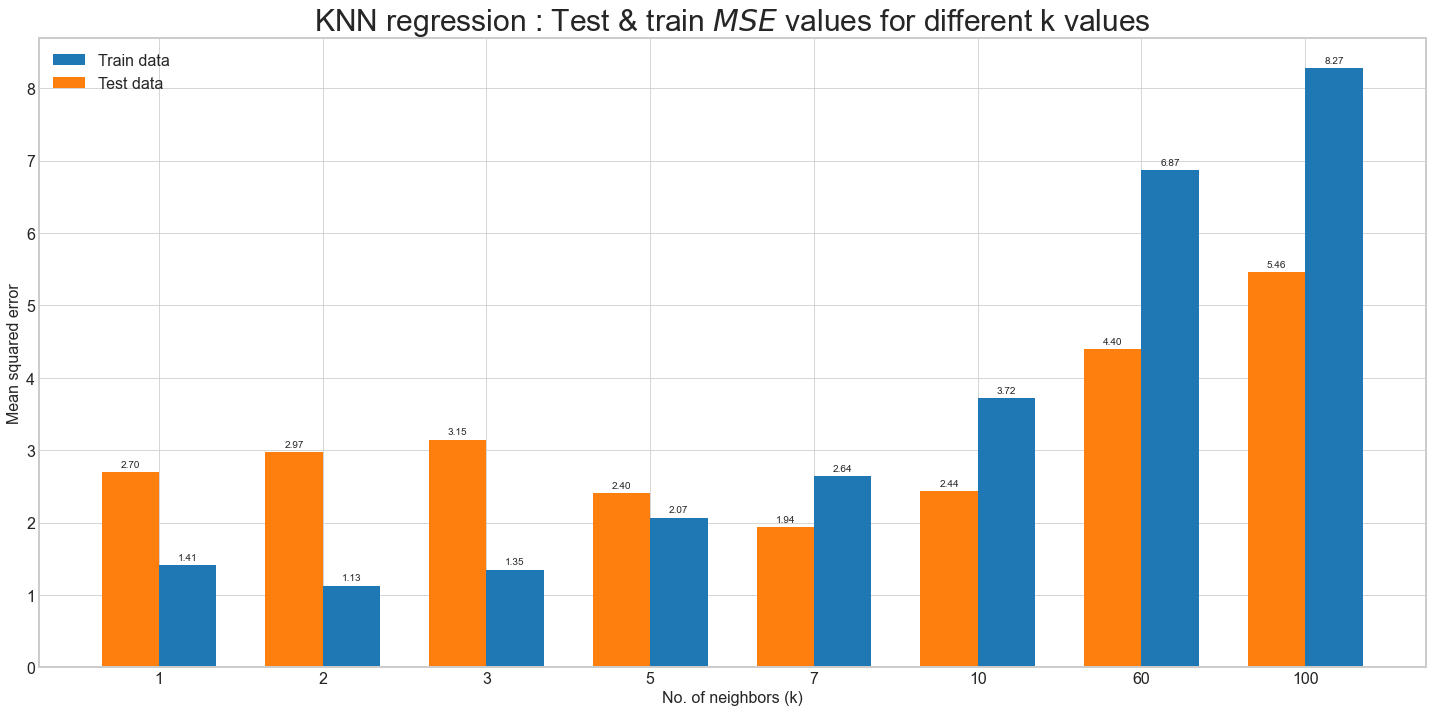

In [141]:
# Now make the MSE plots 
# your code here 
x = np.arange(len(mse_dict_train.keys())) # get all x label indices
width = 0.35  # the width of the bars

# Plotting MSE test & train values
fig, ax = plt.subplots(figsize=(20,10))

# creating bar objects for the clustered plot
train_bar = ax.bar(x + width/2, mse_dict_train.values(), width, label='Train data')
test_bar = ax.bar(x - width/2, mse_dict_test.values(), width, label='Test data')

ax.set_title('KNN regression : Test & train $MSE$ values for different k values',fontsize=30)
ax.set_ylabel('Mean squared error')
ax.set_xlabel('No. of neighbors (k)')
ax.set_xticks(x, mse_dict_train.keys())
ax.legend()

# setting bar labels
ax.bar_label(train_bar, padding=3,fmt="%.2f")
ax.bar_label(test_bar, padding=3,fmt="%.2f")

fig.tight_layout()
plt.show()

In [142]:
# Find the best model
# your code here
minmse_knn = min(mse_dict_test, key=mse_dict_test.get)
print(f'The model which takes {minmse_knn} nearest neighbors has the least mean squared error of {round(mse_dict[minmse_knn],4)}.')

The model which takes 7 nearest neighbors has the least mean squared error of 1.9396.


In [143]:
##Compute the R-squared for the best model
# your code here
y_pred = model_dict[str(minmse_knn)].predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'The best knn model gives an R squared value of {round(r2,4)}')

The best knn model gives an R squared value of 0.8796


### 2.2 

**Your answer here**

**a) How does the value of $k$ affect the fitted model?**
<br />
From the above graph, we can see that as k increases from 7 the MSE score increases which means that our predicted values would be more far off from the actual values. As k increases the model generalises better,reducing overfit at first, before starting to underfit the data for very high values of k.

**b) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?**
<br />
If we use k=n, its actually taking average of all points using that value as prediction response for any value of predictor,x. Such a model will have an r2 value of 0.

**c) Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.**
<br />
Yes, they exhibit different trends. As the value of k increases, the model increasingly underfits the training data, therefore leading to an increasing mean squared error. However, since the model has not seen the test data, there is a different trend with test data, where increasing k reduces the mean squared error, generalises and better fits the test data before starting to underfit. 

**d) Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?**
<br />
The same answer is not obtained as clustering of data changes due to random sampling of data from the dataset. Changing the random seed changes the train and test datasets, and this leads to different best performing model being formed.


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 3:  Simple Linear Regression   [10 points total]</b>
<br /><br />

**3.1** [5pts] We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
<br /><br />
- You will use the same 75% training and 25% testing split of the data, using the same random_state = 106. 
<br />
- Run a Linear Regression model.
<br />
- Report the slope/coefficient and intercept values for the fitted linear model.
<br />
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
<br />
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis. Discuss the shape of the plot and what it shows for the quality of the model.(you can try that for test set as well)
<br /><br />

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
<br /><br />
**3.2** [5pts] Discuss your results by answering the following questions.  
<br />
- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 
<br />
- What does the sign of the slope of the fitted linear model convey about the data? 
<br />
- Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br /><br />
    </div>


### Solutions

### 3.1
**Predict the selling price**

In [257]:
# your code here
x = df[["MRP"]]
y = df["Current_Selling_Price"]
x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=0.75,random_state=106)


	  Linear Regression model
Slope: 0.6351 		 Intercept: 0.0561
Train MSE: 4.2951 	 Test MSE: 4.4323
The R^2 on test is 0.7779


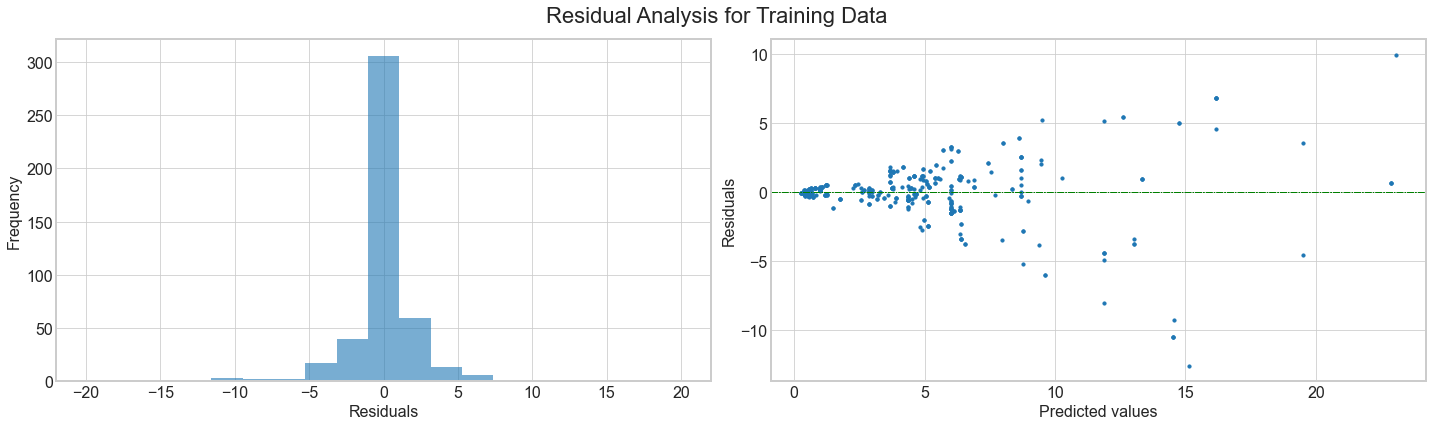

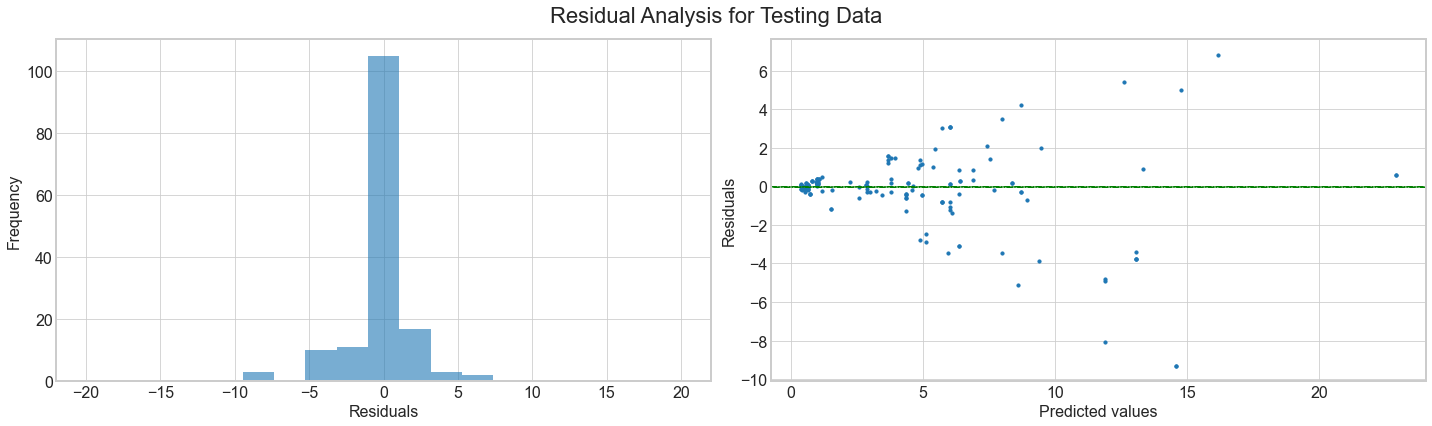

In [258]:
## Fit a linear model to the train data

# your code here
lreg = LinearRegression()
lreg.fit(x_train,y_train)
y_pred_train = lreg.predict(x_train)
y_pred_val = lreg.predict(x_val)
print('\t  Linear Regression model')
print(f'Slope: {lreg.coef_[0]:.4f} \t\t Intercept: {lreg.intercept_:.4f}')
print(f'Train MSE: {mean_squared_error(y_train,lreg.predict(x_train)):.4f} \t Test MSE: {mean_squared_error(y_val,y_pred_val):.4f}')
r2_score_lreg_wo_feat_engg = r2_score(y_val,y_pred_val)
print(f'The R^2 on test is {r2_score_lreg_wo_feat_engg:.4f}')
# end of your code here 


## Plot the **residuals** 
# your code here 
fig, ax = plt.subplots(1,2, figsize = (20,6))

# calculating residuals for train data
residuals = y_train - y_pred_train
# Distribution of predicted values with the residuals for training data
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[0].hist(residuals, bins, alpha=0.6)
# Scatter plot of predicted values with the residuals for training data
ax[1].scatter(y_pred_train, residuals, s = 10)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].axhspan(-0.01,0.001, linestyle='-.',color='g')
fig.suptitle('Residual Analysis for Training Data')
plt.show()

fig, ax = plt.subplots(1,2, figsize = (20,6))
# calculating residuals for test data
residuals = y_val - y_pred_val
# Distribution of predicted values with the residuals for testing data
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[0].hist(residuals, bins, alpha=0.6)
# Scatter plot of predicted values with the residuals for testing data
ax[1].scatter(y_pred_val, residuals, s = 10)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].axhspan(-0.01,0.001, linestyle='-.',color='g')
fig.suptitle('Residual Analysis for Testing Data')
plt.show()

### 3.2

**Your answer here**

**a) How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?**
<br />
The best Knn model has a lower mean squared error compared to the linear model. Even the R^2 value for k-NN regression is higher than linear regression.

**b) What does the sign of the slope of the fitted linear model convey about the data?**
<br />
Positive sign of the slope indicates that as the value of predictor increase the value of response increases.

**c) Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br />**
As residual plot is normally distributed assumption of linearity is valid.


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2"><b> Question 4:  Linear Regression with Feature engineering  [Optional]</b>
<br /><br />

**4.1** Creating a new variable from existing data: percentage depreciation
<br />
Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 
<br />
Our previous regression model relates the Current selling price to the MRP of the car with the equation:
<br /><br />
$$CSP = \beta_0 + \beta_1*MRP$$
<br />
However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which maybe important factors that affect the overall price of the car. 
<br />
Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
<br />
From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 
<br />
Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  
<br />
Define the percentage depreciation of the Current selling price to the MRP as follows:
<br /><br />
$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
<br /><br />
**4.2** Exploratory Data Analysis
<br /><br />
For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
<br /><br />
Answer the following questions by plotting graphs.
<br /><br />
a) It is seen previously that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?
<br />
b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
<br />
c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 
<br />
d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
<br /><br />
**4.3** Perform additional EDA 
<br /><br />
Feel free to use other plots and statistics to find the best predictor and/or understand the relationship between variables. One example is given below. It is a plot of `Current Selling Price` vs `Year` that is color coded based on the `Kms_Driven`.
<br /><br />
**4.4** Fitting a Linear Regression model
<br /><br />
Based on the previous EDA choose appropriate **feature** variable(s) and use `perc` as **response** variable.
<br /><br />
- Again, split the data into training data of 75% and testing data of 25%.
<br />
- Fit a Linear Regression model for each of the predictors.
<br />
- Predict the model for the train and test data.
<br />
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
<br />
- Report the $MSE$ score from the training and test sets.
<br />
- Find the best model i.e. the best predictor based on the $MSE$ of each model.
<br /><br />

**4.5** Predicting The Current Selling Price using ```perc``` 
<br /><br />
After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score?
    <br /><br />
 </div>

## Solutions

### 4.1

In [189]:
#Create a new column perc and add to the dataframe
# your code here
df = pd.read_csv("data/car_dekho_full.csv")
#Creating a new column perc
df["perc"] = (df["MRP"] - df["Current_Selling_Price"])/df["MRP"]
df.head()

,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.70,3493,0.079
1,2005,3.51,13.70,75000,0.744
2,2010,0.31,1.05,213000,0.705
3,2006,2.10,7.60,50456,0.724
4,2005,0.20,0.57,55000,0.649


### 4.2

Answer:
It can be seen that the Current Selling Price should increase with Year as the car is relatively new. 
But, 'Perc' seems to be decreasing as year increases. This is as expected as recent cars will have lesser depreciation compared to older ones.


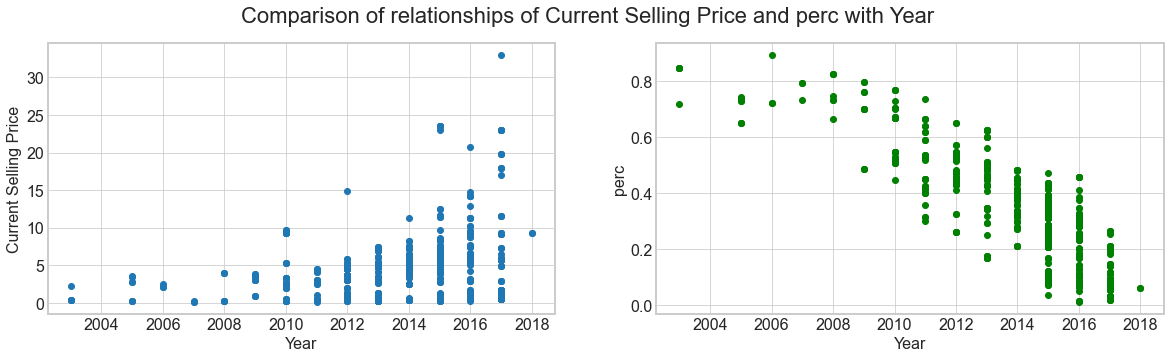

In [156]:
# your code here
#  It is seen previously that there is a relationship between Year and Current Selling Price. 
# a) Is the relationship between Year and perc the same. If not, how has it changed and why do you think so?
x = df["Year"]
y = df["Current_Selling_Price"]
y_new = df["perc"]

fig,ax = plt.subplots(1,2,figsize=(20,5))
fig.suptitle("Comparison of relationships of Current Selling Price and perc with Year")
# Plotting Year vs Current Selling Price
ax[0].scatter(x,y)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Current Selling Price")

# Plotting Year vs perc
ax[1].scatter(x,y_new,color='g')
ax[1].set_xlabel("Year")
ax[1].set_ylabel("perc")

print("Answer:\nIt can be seen that the Current Selling Price should increase with Year as the car is relatively new. \nBut, 'Perc' seems to be decreasing as year increases. This is as expected as recent cars will have lesser depreciation compared to older ones.")
plt.show()

**Your answer here**


Answer:
No clear trend can seen between perc and MRP even though MRP and Current selling price have a linear relationship.
Intuitively, it seems that this is because the value depreciation cannot be a function of the MRP.


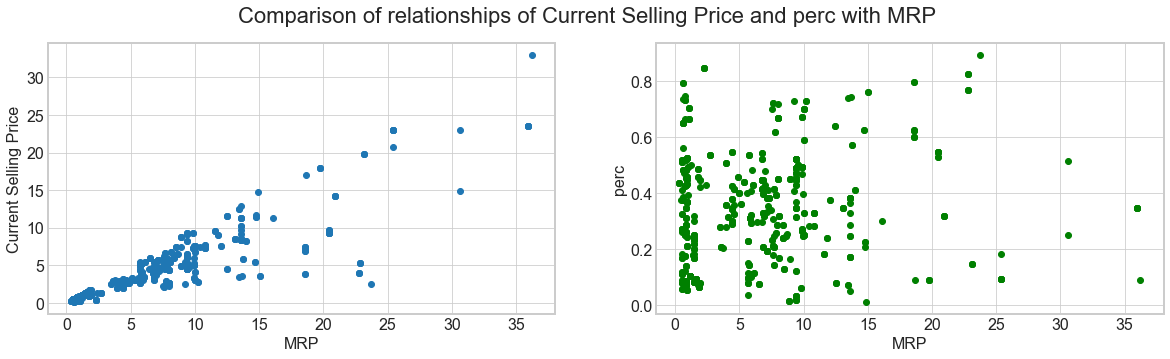

In [158]:
# your code here
# b) Is the trend between the MRP and perc the same as that between MRP and Current Selling Price?
x = df["MRP"]
y = df["Current_Selling_Price"]
y_new = df["perc"]

fig,ax = plt.subplots(1,2,figsize=(20,5))
fig.suptitle("Comparison of relationships of Current Selling Price and perc with MRP")
# Plotting MRP vs Current Selling Price
ax[0].scatter(x,y)
ax[0].set_xlabel("MRP")
ax[0].set_ylabel("Current Selling Price")

# Plotting MRP vs perc
ax[1].scatter(x,y_new,color='g')
ax[1].set_xlabel("MRP")
ax[1].set_ylabel("perc")

print("Answer:\nNo clear trend can seen between perc and MRP even though MRP and Current selling price have a linear relationship.\nIntuitively, it seems that this is because the value depreciation cannot be a function of the MRP.")
plt.show()

**Your answer here**


Answer:
It is observed that most newer cars are lesser driven and with an increase in kms driven the Current Selling Price 
decreases, which leads to an increase in perc.


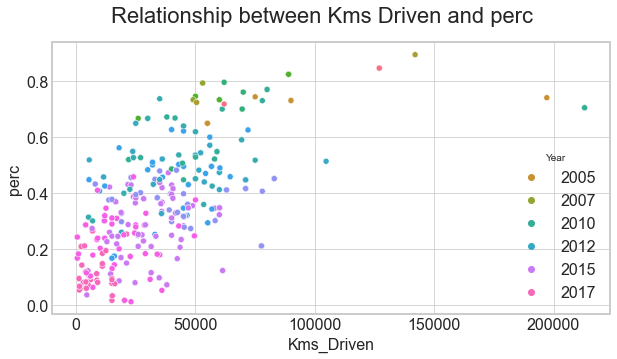

In [160]:
# your code here
# c) Does there seem to be a relationship between Kms_Driven and perc ?
x = df["Kms_Driven"]
y = df["Current_Selling_Price"]
y_new = df["perc"]

fig,ax = plt.subplots(1,1,figsize=(10,5))
fig.suptitle("Relationship between Kms Driven and perc")
# Plotting Kms Driven vs perc
sns.scatterplot(x=x,y=y_new,hue=df.Year,palette="husl")
ax.set_xlabel("Kms_Driven")
ax.set_ylabel("perc")

print("Answer:\nIt is observed that most newer cars are lesser driven and with an increase in kms driven the Current Selling Price \ndecreases, which leads to an increase in perc.")
plt.show()

**Your answer here**
<br>
The best predictors to predict perc appears to be Kms driven and Year but for Current Selling Price it was MRP.

### 4.3

Observations:
      1.MRP increases with Year
      2.Kms driven decreases with Year
					Pair plots of all features to identify trends


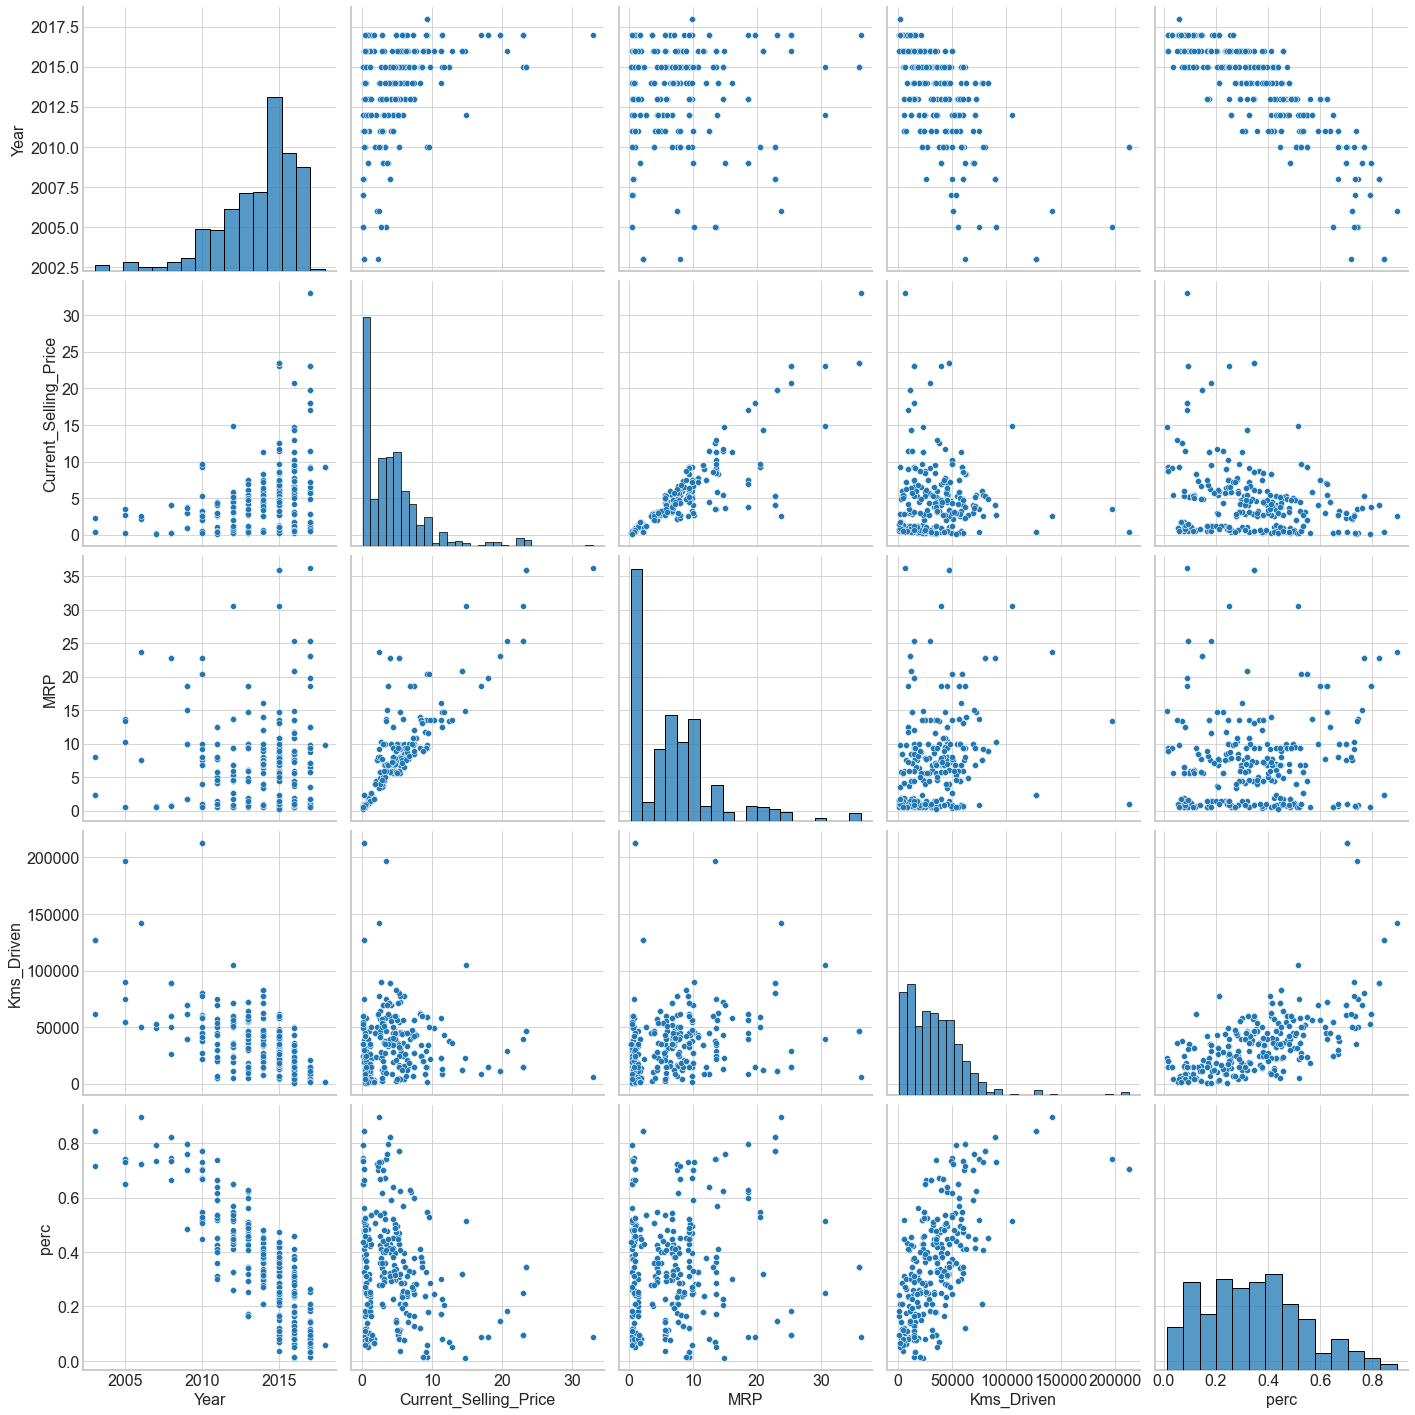

In [182]:
#your code here
# 4.3 Perform additional EDA
# Feel free to use other plots and statistics to find the best predictor and/or understand the relationship between variables. 
# One example is given below. 
# It is a plot of Current Selling Price vs Year that is color coded based on the Kms_Driven.
print("Observations:\n\
      1.MRP increases with Year\n\
      2.Kms driven decreases with Year")
print("\t\t\t\t\t\033[1mPair plots of all features to identify trends\033[0m")
sns.pairplot(df,height=4)
plt.show()

Observation: New cars are more likely to have less kms driven.



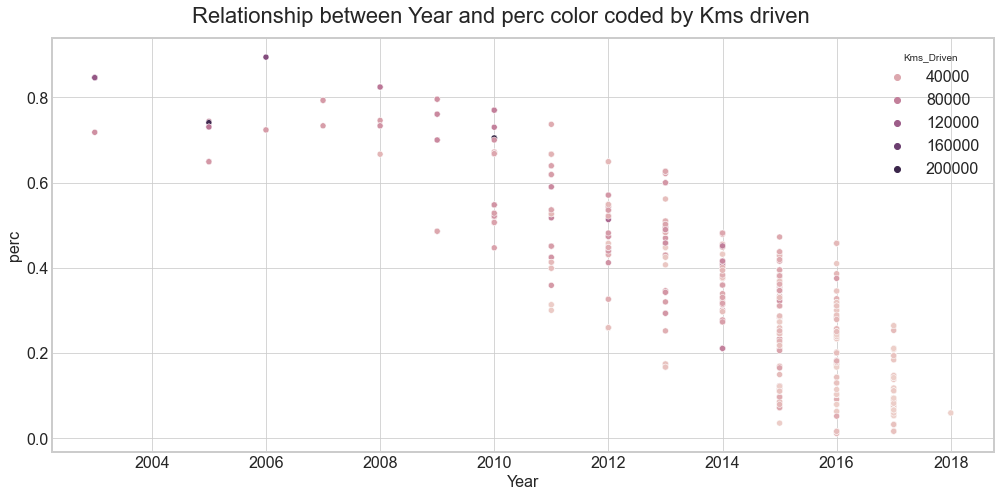

In [218]:
x = df["Year"]
y = df["perc"]

fig,ax = plt.subplots(1,1,figsize=(14,7))
fig.suptitle("Relationship between Year and perc color coded by Kms driven")
sns.scatterplot(x=x,y=y,hue=df.Kms_Driven)
ax.set_xlabel("Year")
ax.set_ylabel("perc")

print("Observation: New cars are more likely to have less kms driven.\n")

plt.show()

Observations:
      1.As expected there's a high correlation between perc & Year.
      2.As expected there's a high correlation between perc & Kms_Driven.
      3.The best predictor for perc is Year as per EDA.


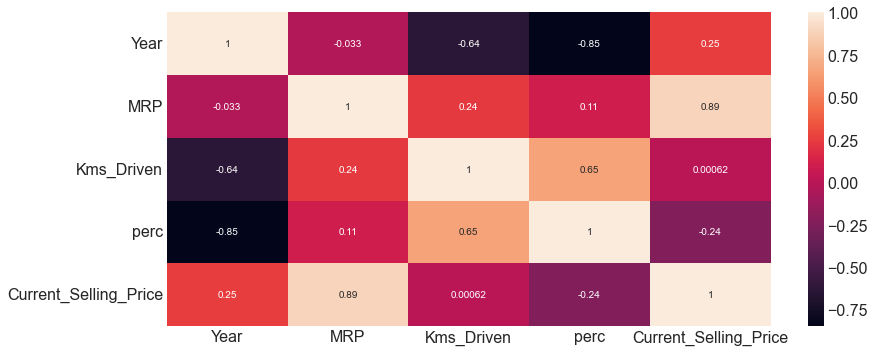

In [221]:
plt.figure(figsize=(13,5))
corrMatrix = df[['Year','MRP','Kms_Driven','perc','Current_Selling_Price']].corr() 
sns.heatmap(corrMatrix, annot=True) 
print("Observations:\n\
      1.As expected there's a high correlation between perc & Year.\n\
      2.As expected there's a high correlation between perc & Kms_Driven.\n\
      3.The best predictor for perc is Year as per EDA.")
plt.show()

### 4.4

In [238]:
# 4.4 Fitting a Linear Regression model
# Based on the previous EDA choose appropriate feature variable(s) and response variable.
# Again, split the data into training data of 75% and testing data of 25%.
    # Fit a Linear Regression model for each of the predictors.
    # Predict the model for the train and test data.
    # Plot a graph with the test data with predictor variable on the x axis and perc on the y axis. 
    # Also plot the fit curve. Ensure you use the correct labels and show the legend.
    # Report the  𝑀𝑆𝐸  score from the training and test sets.
    # Find the best model i.e. the best predictor based on the  𝑀𝑆𝐸  of each model.

# Function to fit linear regression model for each predictor & response variable
def predict_lreg(x,y,show_plots,show_scores):
    # split data
    x_train,x_val,y_train,y_val = train_test_split(df[[x]],df[y],train_size=0.75,random_state=0)
    
    # fit a linear regression model
    lreg = LinearRegression()
    lreg.fit(x_train,y_train)

    # predict values
    y_pred_train = lreg.predict(x_train)
    y_pred_val = lreg.predict(x_val)

    # compute scores
    mse_test = mean_squared_error(y_val,y_pred_val)
    mse_train = mean_squared_error(y_train,y_pred_train)
    r2_score_x = r2_score(y_val,y_pred_val)

    # display scores
    if show_scores:
        print(f'Predictor: {x} \t\t Response: {y}')
        print(f'Train MSE score:{mse_train:.4f} \t\tTest MSE score:{mse_test:.4f}')
        print(f'r2_score: {r2_score_x}')
        print()
        
    # display plots
    if show_plots:
        fig,ax = plt.subplots(1,1,figsize=(15,5))
        fig.suptitle(f'Linear Regression plot between {x} and {y}')
        ax.scatter(x_val,y_val,label='test data points')
        ax.set_xlabel(x)
        ax.set_ylabel(y)

        x_pts_pred = pd.DataFrame(data=list(np.linspace(max(df[x].values),min(df[x].values),100)),columns=[x])
        y_pts_pred = lreg.predict(x_pts_pred)
        ax.plot(x_pts_pred.values,y_pts_pred,label='fit curve',color='orange',linewidth=4)
        plt.legend()
        plt.show()

    return lreg

Predictor: Year 		 Response: perc
Train MSE score:0.0105 		Test MSE score:0.0108
r2_score: 0.7398974277763634



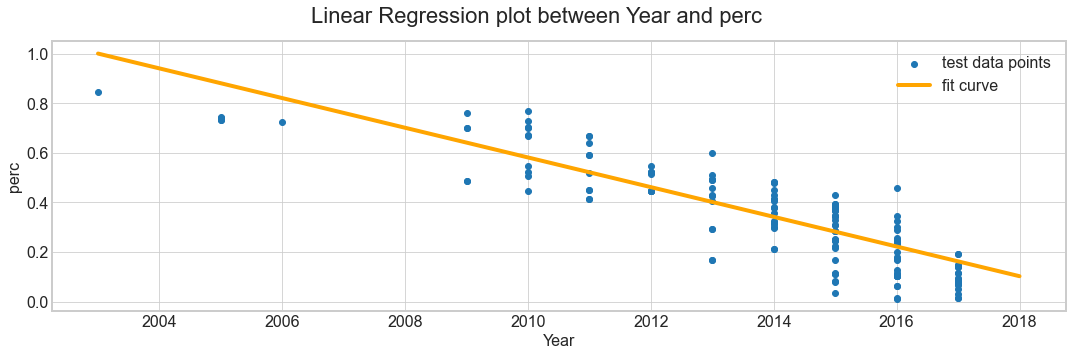

In [239]:
# Linear Regression using Year as the reponse variable
# your code here
x = "Year"
y = "perc"

model = predict_lreg(x,y,True,True)

Predictor: MRP 		 Response: perc
Train MSE score:0.0356 		Test MSE score:0.0409
r2_score: 0.01687311932181179



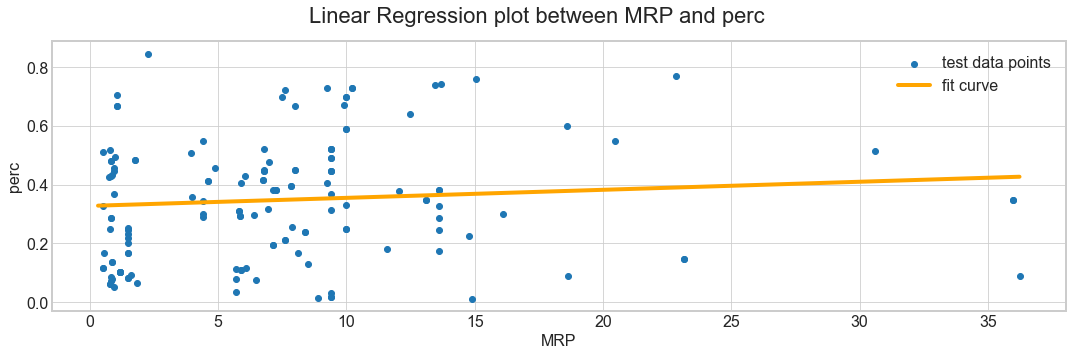

In [240]:
# Linear Regression using MRP as the reponse variable
# your code here
x = "MRP"
y = "perc"

model = predict_lreg(x,y,True,True)

Predictor: Kms_Driven 		 Response: perc
Train MSE score:0.0211 		Test MSE score:0.0222
r2_score: 0.4664860753023298



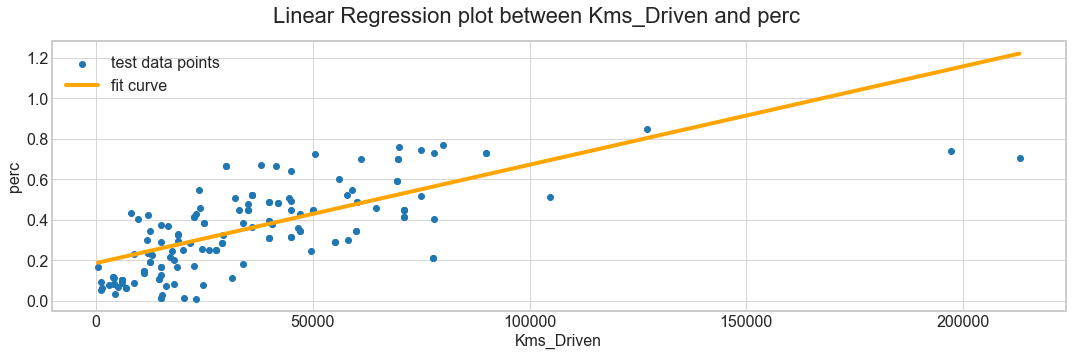

In [241]:
# Linear Regression using KMs Driven as the reponse variable
# your code here
x = "Kms_Driven"
y = "perc"

model = predict_lreg(x,y,True,True)

**Your answer here**
<br>
Best predictor for perc: Year
<br>
r2_score: 0.7398974277763634

### 4.5

Answer:
Best R2 score without feature engg on test dataset: 0.7779.
Best R2 score with feature engg on test dataset: 0.9641.


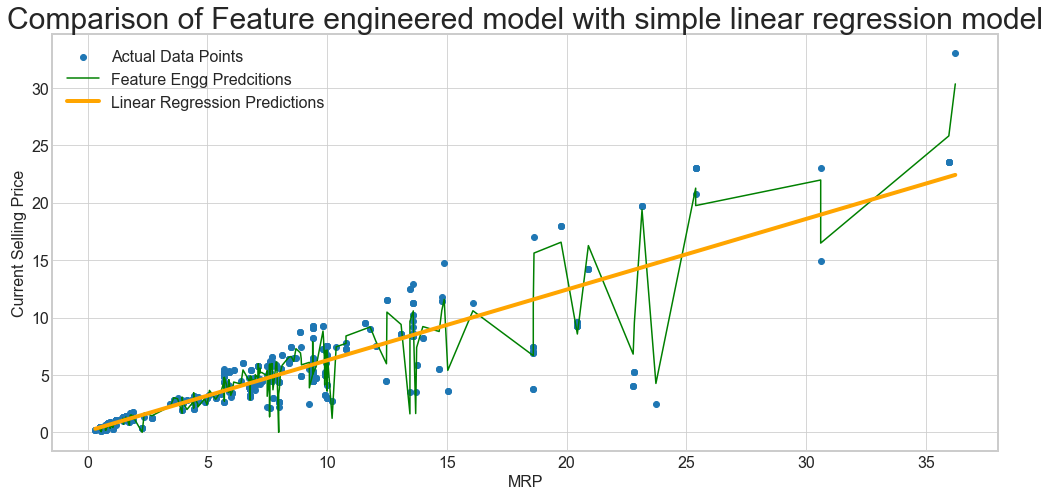

In [262]:
#Linear Regression using Year as the reponse variable
# your code here
# 4.5 Predicting The Current Selling Price using perc

#----------predict perc using Year ------------
x = "Year"
y = "perc"
best_model = predict_lreg(x,y,False,False)
x_train,x_val,y_train,y_val = train_test_split(df[[x,"MRP","Current_Selling_Price"]],df[y],train_size=0.75,random_state=0)
y_pred_perc = best_model.predict(x_val[[x]])

#----------convert perc to Current Selling Price ------------
y_pred_csp = (x_val.MRP.values-(x_val.MRP.values*y_pred_perc.T))

#----------calculate r2 score ------------
r2_score_dramatic_increase = r2_score(x_val.Current_Selling_Price.values,y_pred_csp)

# After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score?
print(f'Answer:\nBest R2 score without feature engg on test dataset: {r2_score_lreg_wo_feat_engg:.4f}.\nBest R2 score with feature engg on test dataset: {r2_score_dramatic_increase:.4f}.')

#----------plot entire dataset ------------
plt.figure(figsize=(14,7))
plt.title("Comparison of Feature engineered model with simple linear regression model",fontsize=30)
plt.scatter(df.MRP,df.Current_Selling_Price,label='Actual Data Points')

#----------plot feat engg model ------------
y_pred_perc = best_model.predict(df[[x]])
y_pred_csp = (df.MRP.values-(df.MRP.values*y_pred_perc.T))
idx = np.argsort(df.MRP[:]) 
x_feat_engg = df.MRP[idx] 
y_feat_engg = y_pred_csp[idx] 
plt.plot(x_feat_engg,y_feat_engg,color='g',label='Feature Engg Predcitions')


#----------plot lin reg model ------------
x = df[["MRP"]]
y = df["Current_Selling_Price"]
x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=0.75,random_state=109)
lreg = LinearRegression()
lreg.fit(x_train,y_train)

x_pts_pred = pd.DataFrame(data=list(np.linspace(max(df.MRP.values),min(df.MRP.values),100)),columns=["MRP"])
y_pts_pred = lreg.predict(x_pts_pred)
plt.plot(x_pts_pred.values,y_pts_pred,label='Linear Regression Predictions',color='orange',linewidth=4)
plt.xlabel("MRP")
plt.ylabel("Current Selling Price")
plt.legend()
plt.show()

**Your answer here**
<br>
Our new model with feature engg is no longer a straight line and better fits all the data points as compared to a 
simple Linear Regression model.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part Β :  Multi-Linear Regression [25 points total] </h2><br />


### Problem Description: 

Analysis of publically available profiles on **simplymarry** to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the **simplymarry** site.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are unlikely to hide any deeply held cultural or sociological biases in order to be perceived as being politically correct. This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias.

This is a dataset designed to make you think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as do these biases reduce among more educated users, or more urban users?  

In [263]:
# Read the file named "Income_prediction.csv"

df = pd.read_csv('data/Income_prediction.csv')

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 5:   Using Data science to learn more about Indian society  [15 points total]</b>
<br />
First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.
<br /><br />
Answer the below questions using plots & simple statistics
<br /><br />
**5.1** [2pt] Is there a gender-bias for income of participants?
<br /><br />
**5.2** [2pt] Is there a correlation between income and skin complexion?
<br /><br />
**5.3** [2pt] Is there a discernable trend in the incomes of participants from different regions/cities?
<br /><br />
**5.4** [1pt] Is there a clear trend between BMI and the income?
<br /><br />
**5.5** [2pt] Does the level of education show a clear trend with income?
<br /><br />
**5.6** [2pt] Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
<br /><br />
**5.7** [2pt] Is the income lower or high for those living in 'nuclear' families?
<br /><br />
**5.8** [2pt] Is being 'Manglik' negatively affect the income of participants?

### Solutions

### 5.1

The average annual income for male is $13849.10 whereas the average annual income for female is $8450.58
The dataset has more male profiles (5852) as compared to female profiles (1561).


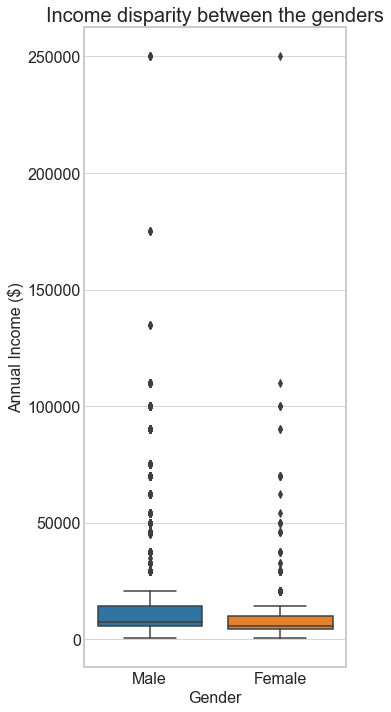

In [266]:
# your code here
#  [2pts] Is there a gender-bias for income of participants?
# getting predictor and response variable data
x = df["gender"]
y = df["income"]

# calculating stats of each category
mean_male_income = df[df['gender']==1].income.mean()
mean_female_income = df[df['gender']==0].income.mean()
num_male = df.gender.value_counts()[1]
num_female = df.gender.value_counts()[0]
print(f'The average annual income for male is ${mean_male_income:.2f} whereas the average annual income for female is ${mean_female_income:.2f}')
print(f'The dataset has more male profiles ({num_male}) as compared to female profiles ({num_female}).')

# replacing numerical values with category name from the data
x_new = []
for i in range(0,len(x)):
    if x[i] == 0:
        x_new.append("Female")
    else:
        x_new.append("Male")

# Plotting box plot to see income disparity between the groups
fig = plt.figure(figsize = (5,10))
plt.title("Income disparity between the genders",fontsize=20)
sns.boxplot(x=x_new,y=y)
plt.ylabel("Annual Income ($)")
plt.xlabel("Gender")
plt.show()

### 5.2

There is no correlation between the income and skin complexion as seen by the 
near zero pearson's correlation coefficient = -0.0863

                 No of People  Mean Income ($)
Very Fair                 705        18577.477
Fair                     4178        12478.919
Wheatish                 1910        11757.694
Wheatish Medium           536        10414.396
Dark                       84        11463.333 



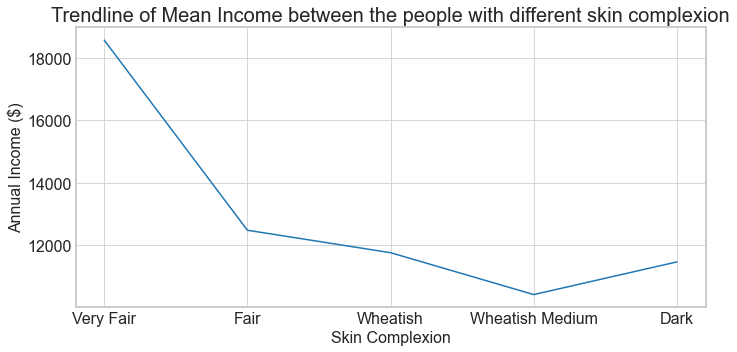

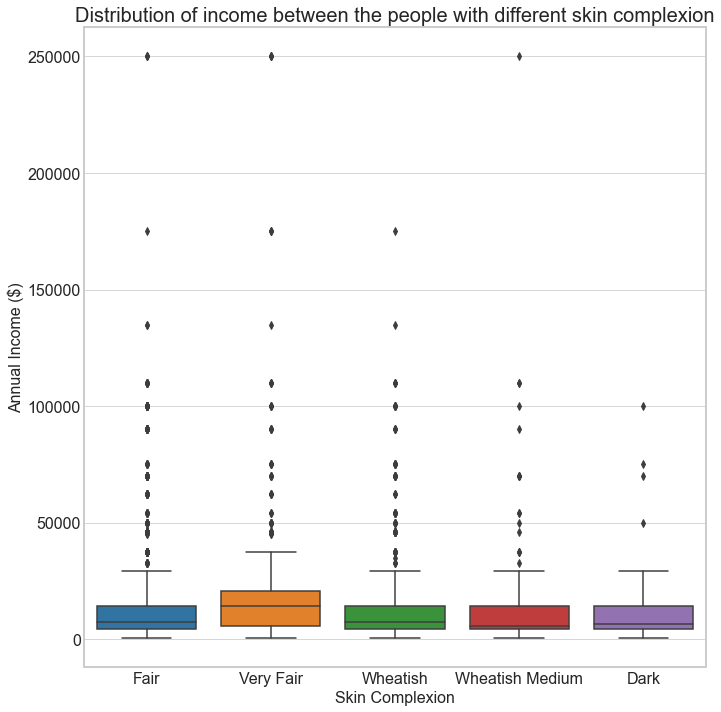

In [271]:
# you code here

# [2pts] Is there a correlation between income and skin complexion?
# getting predictor and response variable data
x = df["complexion"]
y = df["income"]

# replacing numerical values with category name from the data
dict_ = {1:"Very Fair",2:"Fair",3:"Wheatish",4:"Wheatish Medium",5:"Dark"}
x_new = []
for i in range(0,len(x)):
    x_new.append(dict_[x[i]])

# calculating stats of each category
means = []
num_people = []
comp = ["Very Fair","Fair","Wheatish","Wheatish Medium","Dark"]
for i in range(1,6):
    means.append(df[df['complexion']==i].income.mean())
    num_people.append(df.complexion.value_counts()[i])
comp_df = pd.DataFrame(data=num_people,index=comp,columns=["No of People"])
comp_df["Mean Income ($)"] = means
print(f"There is no correlation between the income and skin complexion as seen by the \nnear zero pearson's correlation coefficient = {df[['income','complexion']].corr()['income']['complexion']:.4f}\n")
print(comp_df,"\n")

# Plotting trend line to see income disparity between the groups
fig = plt.figure(figsize = (10,5))
plt.plot(comp,means)
plt.xlabel("Skin Complexion")
plt.ylabel("Annual Income ($)")
plt.title("Trendline of Mean Income between the people with different skin complexion",fontsize=20)
plt.show()

# Plotting box plot to see income disparity between the groups
fig = plt.figure(figsize = (10,10))
sns.boxplot(x=x_new,y=y)
plt.title("Distribution of income between the people with different skin complexion",fontsize=20)
plt.xlabel("Skin Complexion")
plt.ylabel("Annual Income ($)")
plt.show()

### 5.3

There is a decreasing trend in the incomes of participants from different regions/cities. 
1.International profiles having the highest average incomes.
Among the domestic cities,
2.Delhi is having the highest average income followed by Mumbai and Kolkata.
3.Surat, Vishakhapatnam and others having the least.



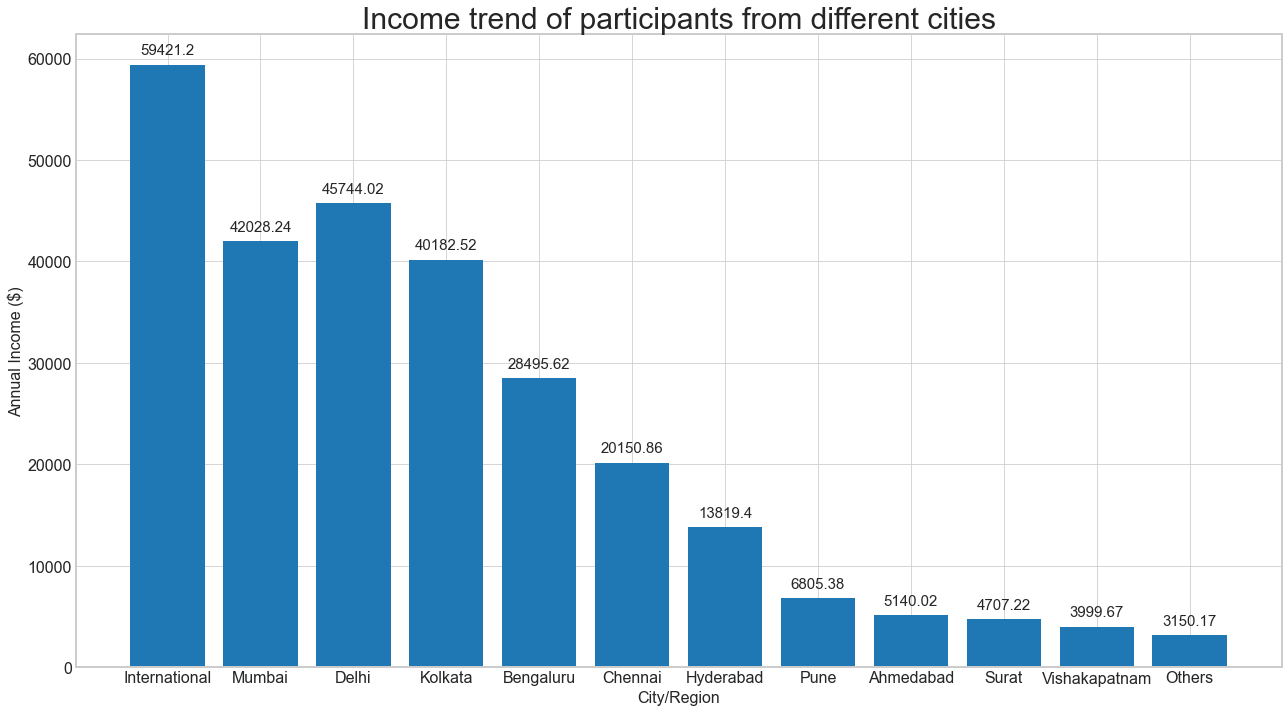

In [301]:
# your code here
#  [2pts]Is there a discernable trend in the incomes of participants from different regions/cities?

# getting predictor and response variable data
x = df["city"]
y = df["income"]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1000,round(y[i],2), ha = 'center',fontsize=15)

# calculating stats of each category      
means = []
city = ['International', 'Mumbai', 'Delhi', 'Kolkata','Bengaluru', 'Chennai', 'Hyderabad', 'Pune', 'Ahmedabad','Surat', 'Vishakapatnam', 'Others']
for i in range(1,13):
    means.append(df[df['city']==i].income.mean())
    
# replacing numerical values with category name from the data
x_new = []
for i in range(0,len(x)):
    x_new.append(city[x[i]-1])

# Plotting bar graphs to see income disparity between the groups
fig = plt.figure(figsize = (18,10))
plt.bar(city,means)
plt.xlabel("City/Region")
plt.ylabel("Annual Income ($)")
plt.title("Income trend of participants from different cities",fontsize=30)
addlabels(city,means)
print(f"There is a decreasing trend in the incomes of participants from different regions/cities. \n\
1.International profiles having the highest average incomes.\n\
Among the domestic cities,\n\
2.Delhi is having the highest average income followed by Mumbai and Kolkata.\n\
3.Surat, Vishakhapatnam and others having the least.\n")

plt.show()

### 5.4

There is no correlation between the income and bmi as seen by the near zero pearson's correlation coefficient of 0.0288


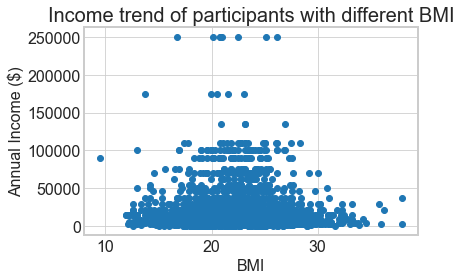

In [297]:
# your code here
# [1pt]Is there a clear trend between BMI and the income?

# getting predictor and response variable data
x = df["bmi"]
y = df["income"]

# calculating stats of each category
print(f"There is no correlation between the income and bmi as seen by the near zero pearson's correlation coefficient of {df[['income','bmi']].corr()['income']['bmi']:.4f}")

# Plotting scatter plot to see income disparity between the groups
plt.scatter(x,y)
plt.xlabel("BMI")
plt.ylabel("Annual Income ($)")
plt.title("Income trend of participants with different BMI",fontsize=20)
plt.show()

### 5.5

There is an increasing trend in the incomes of participants with increasing level of education.



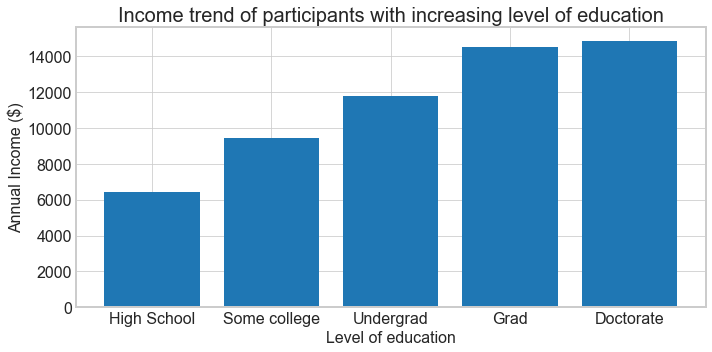

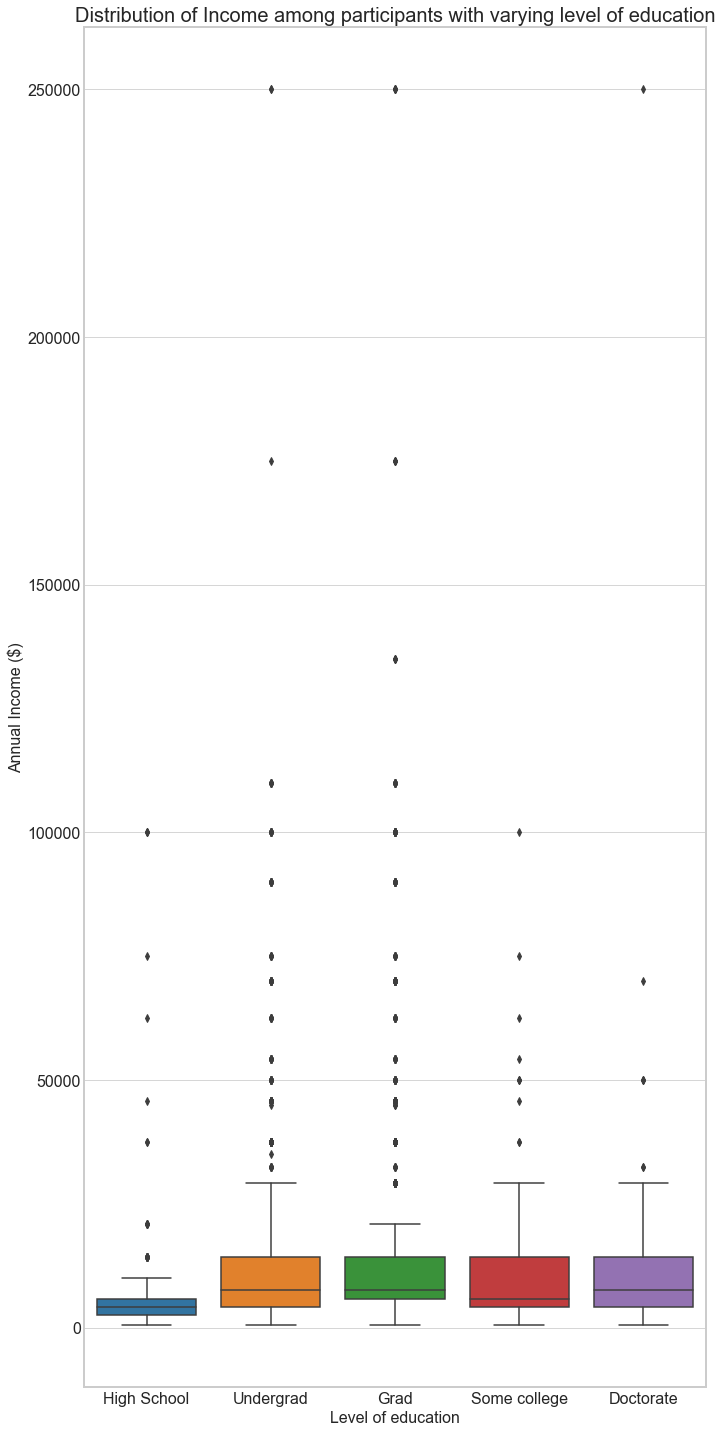

In [298]:
# your code here
# [2pts] Does the level of education show a clear trend with income?

# getting predictor and response variable data
x = df["education"]
y = df["income"]

# calculating stats of each category
means = []
edu = ['High School', 'Some college','Undergrad', 'Grad', 'Doctorate']
for i in range(0,5):
    means.append(df[df['education']==i].income.mean())

# replacing numerical values with category name from the data
x_new = []
for i in range(0,len(x)):
    x_new.append(edu[x[i]])


# Plotting bar graph to see income disparity between the groups
fig = plt.figure(figsize = (10,5))
plt.bar(edu,means)
plt.xlabel("Level of education")
plt.ylabel("Annual Income ($)")
plt.title("Income trend of participants with increasing level of education",fontsize=20)
print(f"There is an increasing trend in the incomes of participants with increasing level of education.\n")
plt.show()

# Plotting box plot to see Distribution of Income among participants with varying level of education
fig = plt.figure(figsize = (10,20))
sns.boxplot(x=x_new,y=y)
plt.title("Distribution of Income among participants with varying level of education",fontsize=20)
plt.xlabel("Level of education")
plt.ylabel("Annual Income ($)")
plt.show()

### 5.6

There doesn't seem to be a clear linear dependence with the amount of income.

			Pair plots of all numeric features to identify non-linear dependence


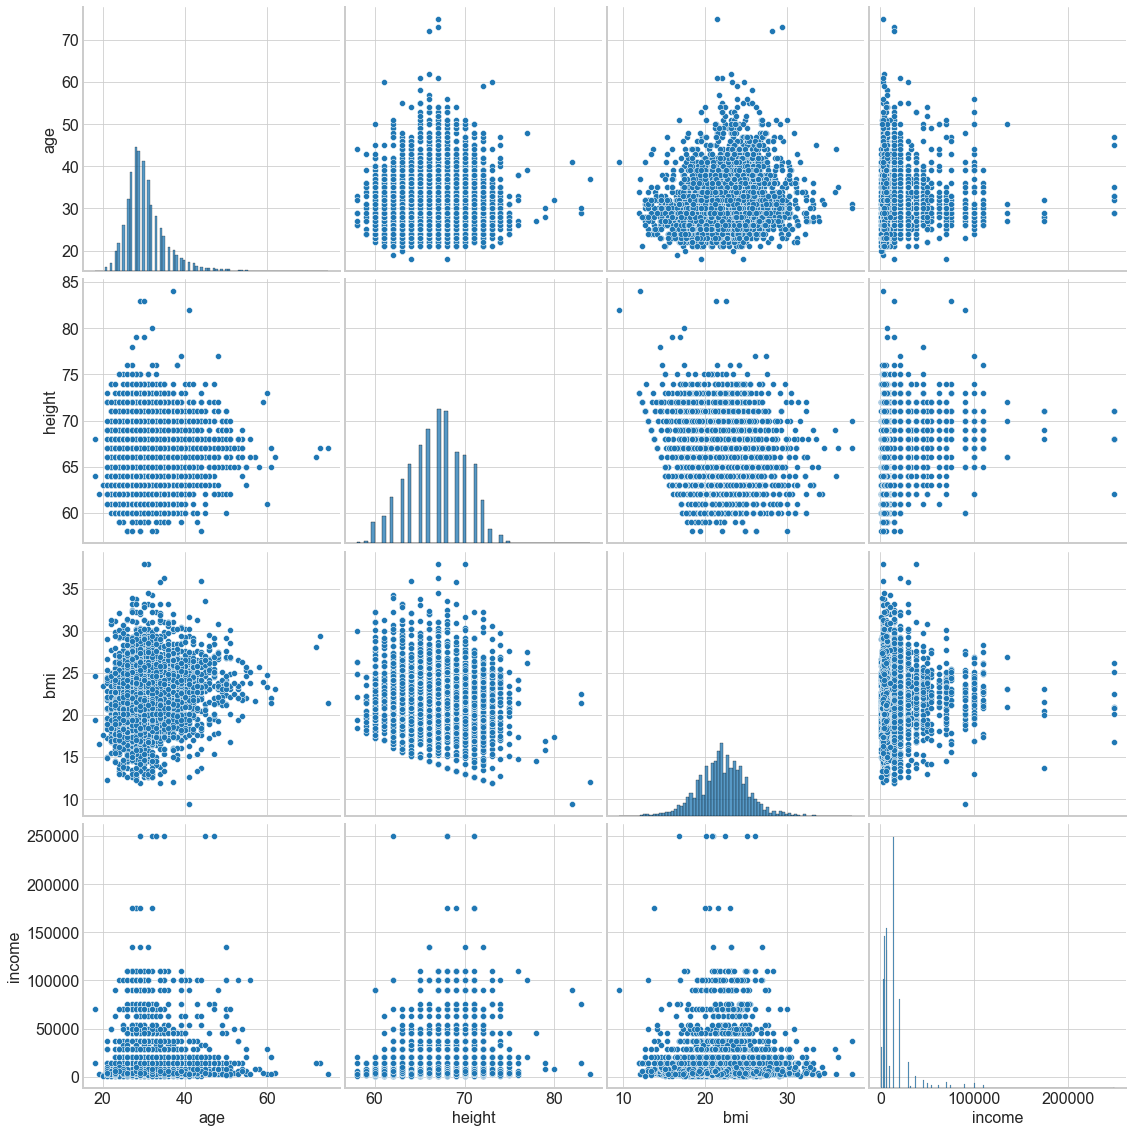

In [307]:
# your code here
# [2pts] Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
print("There doesn't seem to be a clear linear dependence with the amount of income.\n")
sns.pairplot(df[["age","height","bmi","income"]],height=4)
print("\t\t\t\033[1mPair plots of all numeric features to identify non-linear dependence\033[0m")
plt.show()

### 5.7

Nuclear families have higher average income than Joint Family.


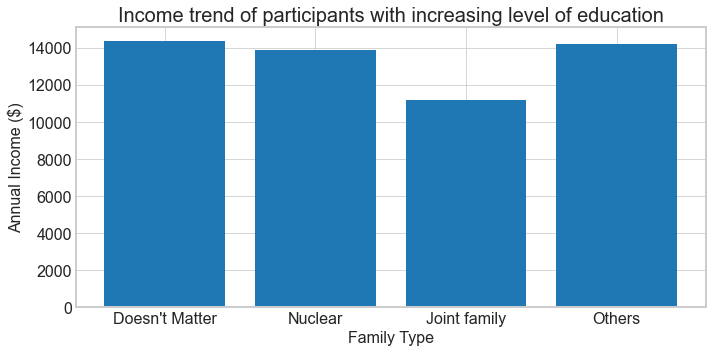

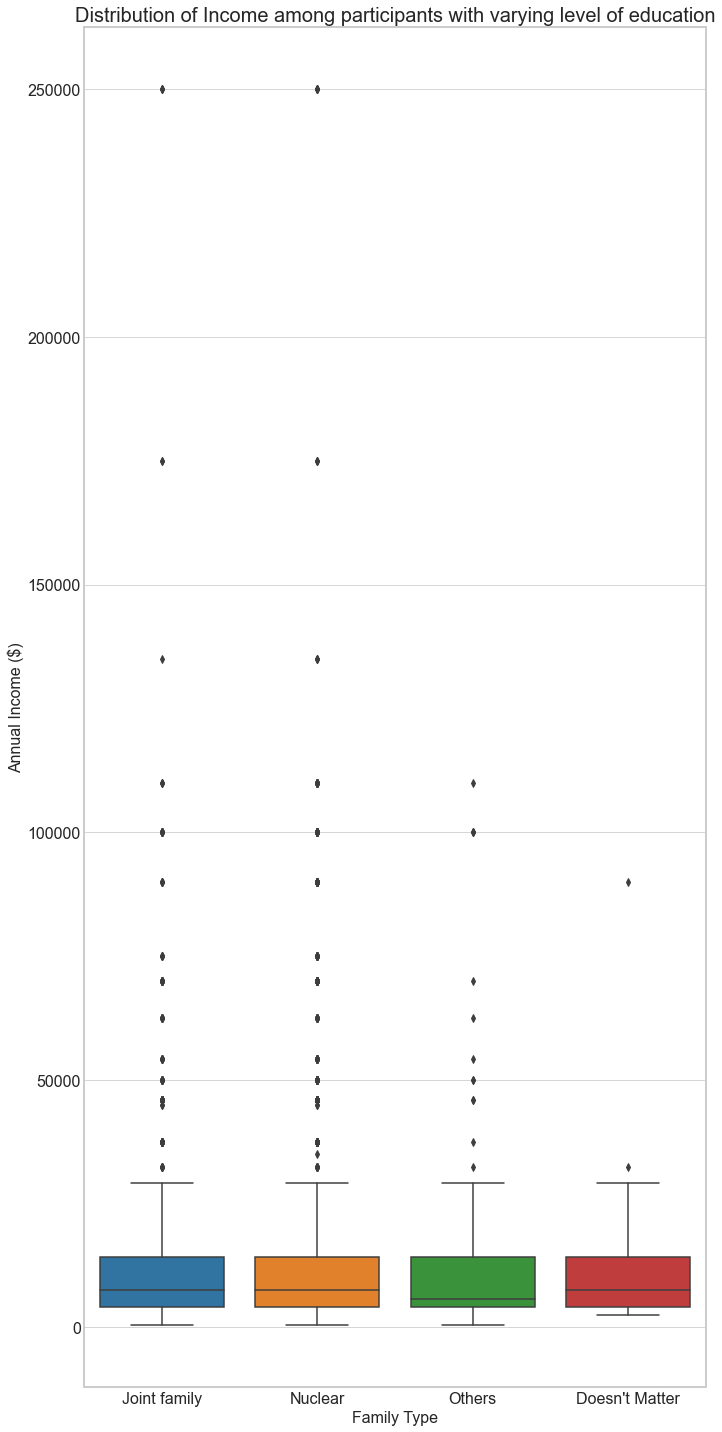

In [309]:
# your code here

# [2pts] Is the income lower or high for those living in 'nuclear' families?
# getting predictor and response variable data
x = df["family_type"]
y = df["income"]

# calculating stats of each category
means = []
for i in range(0,4):
    means.append(df[df['family_type']==i].income.mean())

# replacing numerical values with category name from the data
fam = ["Doesn't Matter", 'Nuclear', 'Joint family', 'Others']
x_new = []
for i in range(0,len(x)):
    x_new.append(fam[x[i]])

print("Nuclear families have higher average income than Joint Family.")
    
# Plotting bar graph to see income disparity between the groups
fig = plt.figure(figsize = (10,5))
plt.bar(fam,means)
plt.xlabel("Family Type")
plt.ylabel("Annual Income ($)")
plt.title("Income trend of participants with increasing level of education",fontsize=20)
plt.show()

# Plotting box plot to see Distribution of Income among participants with varying level of education
fig = plt.figure(figsize = (10,20))
sns.boxplot(x=x_new,y=y)
plt.title("Distribution of Income among participants with varying level of education",fontsize=20)
plt.xlabel("Family Type")
plt.ylabel("Annual Income ($)")
plt.show()

### 5.8

There is no correlation between the income and bmi as seen by the near zero pearson's correlation coefficient of -0.0164


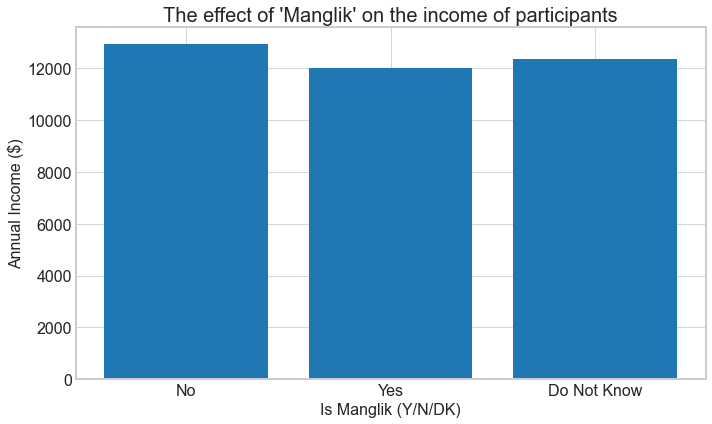

In [315]:
# your code here
# [2pts] Is being 'Manglik' negatively affect the income of participants?

print(f"There is no correlation between the income and bmi as seen by the near zero pearson's correlation coefficient of {df[['income','manglik']].corr()['income']['manglik']:.4f}")

# Plotting box plot to see the effect of 'Manglik' on the income of participants
plt.figure(figsize=(10,6))
manglik = {'No': 0, 'Yes': 1, 'Do Not Know': 2}
manglik_income = df.groupby('manglik')['income'].mean()
plt.bar(manglik.keys(), manglik_income.values)
plt.title("The effect of 'Manglik' on the income of participants",fontsize=20)
plt.xlabel("Is Manglik (Y/N/DK)")
plt.ylabel("Annual Income ($)")
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 6:  Calculate the Gini Index  [10 points total]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.
<br /><br />
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
<br /><br />
**6.2** Compare your gini index with other countries

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated gini index value for this dataset, what is your conclusion on the income disparity in the three countries?

### Solutions

### 6.1

In [318]:
# your code here
y = df["income"] # get incomes of all people from dataset in India
y = np.sort(y.values) # sort all values to get the rank
G = 0
num_G = 0
den_G = 0
n = len(y)
# calculating Gini Coefficient
for i in range(0,n):
    num_G+=(2*i-n-1)*y[i]
    den_G+=n*y[i]
G = num_G/den_G

### 6.2

In [316]:
# This code was written (commented code retained for reference) to extract gini coef of all countries from publicly available dataset of World Bank from the year 2014 
# from the file 'gini.csv' stored on local machine.

# gf=pd.read_csv("gini.csv")
# gf = pd.concat([gf["Country"],gf["2014"]], axis=1, keys=["Country","Gini"])
# gf=gf.dropna()
# gf.head()
# len(gf["Country"])
# dict_ = ""
# for i in range(0,len(gf["Country"])):
#     dict_+=f"\"{gf['Country'].iloc[i]}\":"
#     dict_+=f"{gf['Gini'].iloc[i]},"
# dict_

# output of above code (this was copied in a dict in the following cell)
# '"Albania":34.6,"Argentina":41.6,"Armenia":31.5,"Australia":34.4,"Austria":30.5,"Belgium":28.1,"Burkina Faso":35.3,"Bulgaria":37.4,"Belarus":27.2,"Bolivia":47.8,"Brazil":52.1,"Canada":33.2,"Switzerland":32.5,"China":39.2,"Cameroon":46.6,"Colombia":52.6,"Comoros":45.3,"Costa Rica":48.6,"Cyprus":35.6,"Czech Republic":25.9,"Germany":30.9,"Denmark":28.4,"Dominican Republic":44.3,"Ecuador":45.0,"Spain":36.1,"Estonia":34.6,"Finland":26.8,"France":32.3,"United Kingdom":34.0,"Georgia":37.6,"Greece":35.8,"Guatemala":48.3,"Honduras":49.9,"Croatia":32.1,"Hungary":30.9,"Indonesia":39.4,"Ireland":31.9,"Iran, Islamic Rep.":38.8,"Iceland":27.8,"Israel":39.8,"Italy":34.7,"Kazakhstan":27.0,"Kyrgyz Republic":26.8,"Korea, Rep.":31.2,"Liberia":33.2,"Lithuania":37.7,"Luxembourg":31.2,"Latvia":35.1,"Moldova":26.8,"Mexico":48.7,"North Macedonia":35.2,"Malta":29.0,"Montenegro":38.8,"Mongolia":32.0,"Mozambique":54.0,"Mauritania":32.6,"Niger":34.3,"Nicaragua":46.2,"Netherlands":28.6,"Norway":26.8,"Panama":50.5,"Peru":43.1,"Poland":32.8,"Portugal":35.6,"Paraguay":50.7,"Romania":36.0,"Russian Federation":39.9,"Sudan":34.2,"El Salvador":41.6,"Serbia":40.5,"Slovak Republic":26.1,"Slovenia":25.7,"Sweden":28.4,"Thailand":37.0,"Timor-Leste":28.7,"Turkey":41.2,"Ukraine":24.0,"Uruguay":40.1,"United States":41.5,"Vietnam":34.8,"Kosovo":27.3,"Yemen, Rep.":36.7,"South Africa":63.0,'

South Africa has a high income disparity while Ukaraine is more equal in terms of income distribution.
India lies in the middle with a gini coef of 0.4942.



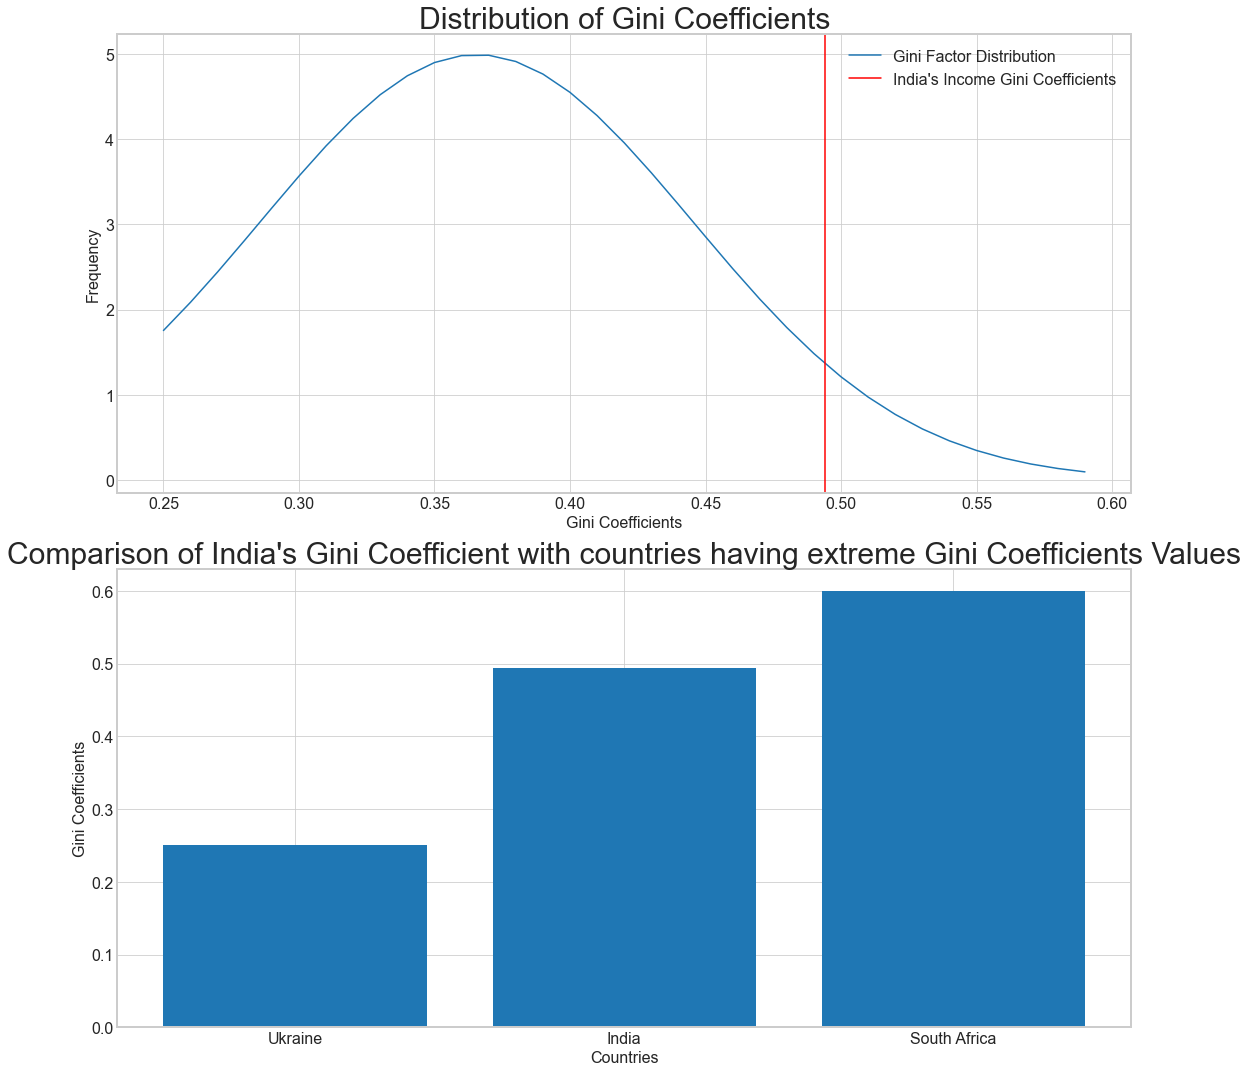

In [329]:
# your code here
# hard coded (as submitting custom csv files is not allowed) gini coef values from the above dataset 
countries = {"Albania":34.6,"Argentina":41.6,"Armenia":31.5,"Australia":34.4,
             "Austria":30.5,"Belgium":28.1,"Burkina Faso":35.3,"Bulgaria":37.4,
             "Belarus":27.2,"Bolivia":47.8,"Brazil":52.1,"Canada":33.2,"Switzerland":32.5,
             "China":39.2,"Cameroon":46.6,"Colombia":52.6,"Comoros":45.3,"Costa Rica":48.6,
             "Cyprus":35.6,"Czech Republic":25.9,"Germany":30.9,"Denmark":28.4,"Dominican Republic":44.3,
             "Ecuador":45.0,"Spain":36.1,"Estonia":34.6,"Finland":26.8,"France":32.3,"United Kingdom":34.0,
             "Georgia":37.6,"Greece":35.8,"Guatemala":48.3,"Honduras":49.9,"Croatia":32.1,"Hungary":30.9,
             "Indonesia":39.4,"Ireland":31.9,"Iran, Islamic Rep.":38.8,"Iceland":27.8,"Israel":39.8,"Italy":34.7,
             "Kazakhstan":27.0,"Kyrgyz Republic":26.8,"Korea, Rep.":31.2,"Liberia":33.2,"Lithuania":37.7,
             "Luxembourg":31.2,"Latvia":35.1,"Moldova":26.8,"Mexico":48.7,"North Macedonia":35.2,"Malta":29.0,
             "Montenegro":38.8,"Mongolia":32.0,"Mozambique":54.0,"Mauritania":32.6,"Niger":34.3,"Nicaragua":46.2,
             "Netherlands":28.6,"Norway":26.8,"Panama":50.5,"Peru":43.1,"Poland":32.8,"Portugal":35.6,"Paraguay":50.7,
             "Romania":36.0,"Russian Federation":39.9,"Sudan":34.2,"El Salvador":41.6,"Serbia":40.5,"Slovak Republic":26.1,
             "Slovenia":25.7,"Sweden":28.4,"Thailand":37.0,"Timor-Leste":28.7,"Turkey":41.2,"Ukraine":24.0,"Uruguay":40.1,
             "United States":41.5,"Vietnam":34.8,"Kosovo":27.3,"Yemen, Rep.":36.7,"South Africa":63.0}

# creating a dataframe for above dict and calculating std_dev & mean
gf = pd.DataFrame(data=countries.values(),index = countries.keys(),columns=["g"])
std_dev = gf["g"].std()/100
mean = gf["g"].mean()/100

print(f'South Africa has a high income disparity while Ukaraine is more equal in terms of income distribution.\nIndia lies in the middle with a gini coef of {G:.4f}.\n')

# Plotting the Distribution of Gini Coefficients
fig,ax = plt.subplots(2,1,figsize = (15,15))
ax[0].plot(np.arange(0.25, 0.6, 0.01), norm.pdf(np.arange(0.25, 0.6, 0.01), mean, std_dev),label="Gini Factor Distribution")
ax[0].axvline(x=G,color='r',label="India's Income Gini Coefficients")
ax[0].set_xlabel("Gini Coefficients")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Gini Coefficients",fontsize=30)
ax[0].legend()

# Comparing India's Gini Coefficient with countries having extreme Gini Coefficients Values
subset_countries = {"Ukraine":.25,"India":G,"South Africa":0.6}
ax[1].bar(subset_countries.keys(),subset_countries.values())
ax[1].set_xlabel("Countries")
ax[1].set_ylabel("Gini Coefficients")
ax[1].set_title("Comparison of India's Gini Coefficient with countries having extreme Gini Coefficients Values",fontsize=30)
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 7:  Multi-Linear Regression  [Optional]</b>

Now we increase the scope of our analysis to solve another problem that is related to income of the participants.

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing more but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

In [336]:
# Here we use another efficient way of splitting the datset into train and test sets using a "mask"

#You can just run the code below, and just use df_train and df_test for this part of the homework directly
mask = np.ones(len(df))

# Using indices only
itrain, itest = train_test_split(range(len(df)),train_size=0.8,random_state = 25)

#setting all test indices as zero
mask[itest] = 0

# Converting mask into a boolean expression
mask = mask==1

In [337]:
df_train = df[mask] # this will give you a dataframe of only training indicies
df_test = df[~mask] # this will give you a dataframe of only test indicies

In [338]:
# A quick look of the training dataframe
df_train.head()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
3,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
5,43,1,65,70,25.680,2,1,1,2,0,0,1,1,4,2,2,0,4,1,2,2500,12
7,29,1,63,48,18.745,2,1,3,1,2,1,1,1,4,2,2,1,4,1,2,2500,12
8,46,1,66,72,25.620,3,1,1,2,1,1,1,1,3,1,4,0,6,1,3,14167,7


Mean squared error of log of income on train set: 0.2297

Mean squared error of log of income on test set: 0.2431
r2 value of log of income on test set: 0.7372



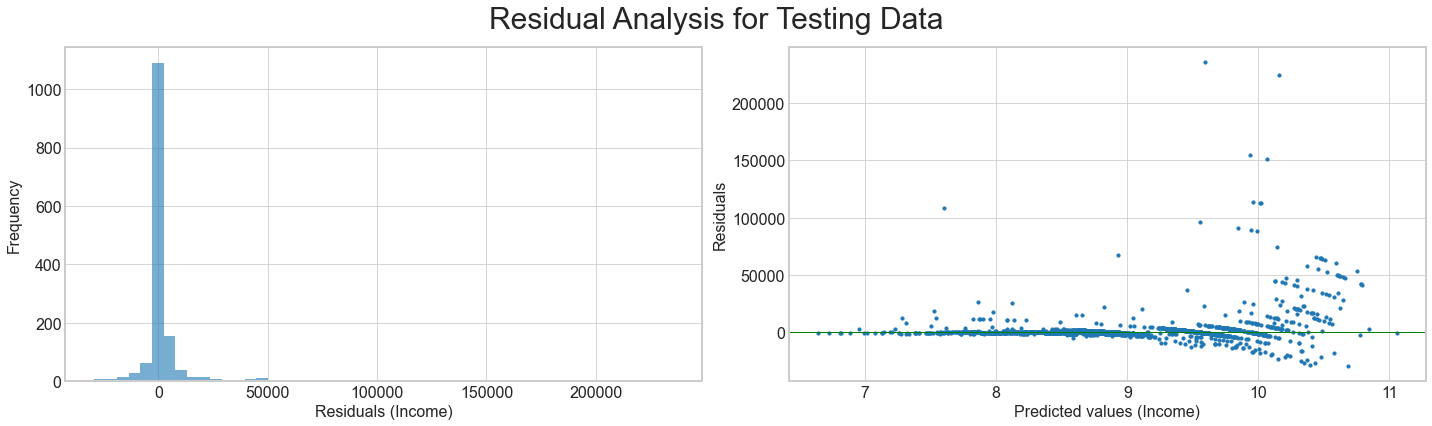

In [344]:
X_train = df_train.drop('income', axis=1) #Dropping response variable from training design matrix 
y_train = np.log(df_train['income']) #Natural log of response variable in training set taken to avoid negative predicted income values  
 
X_test = df_test.drop('income', axis=1) #Dropping response variable from test design matrix 
y_test = np.log(df_test['income']) #Natural log of response variable in training set taken to avoid negative predicted income values  
 
#One hot encoding of all categorical variables 
X_train = pd.get_dummies(X_train, columns=['eating','status','family_type','manglik','drinking','complexion','body','education','city','values','smoking','caste_imp','living','marital_status','employed','horoscope'],  
                   prefix=['eating','status','family_type','manglik','drinking','complexion','body','education','city','values','smoking','caste_imp','living','marital_status','employed','horoscope']) 
 
X_test = pd.get_dummies(X_test, columns=['eating','status','family_type','manglik','drinking','complexion','body','education','city','values','smoking','caste_imp','living','marital_status','employed','horoscope'],  
                   prefix=['eating','status','family_type','manglik','drinking','complexion','body','education','city','values','smoking','caste_imp','living','marital_status','employed','horoscope']) 
 

#Fitting  a multiple linear regression model on the training data 
lreg = LinearRegression(fit_intercept=False) 
lreg.fit(X_train,y_train) 
 
#Predicting using the multiple linear regression model on the test data 
y_pred_train = lreg.predict(X_train)
y_pred_test = lreg.predict(X_test) 
 
#Model evaluation using mean squared error and r2 score 
print(f'Mean squared error of log of income on train set: {mean_squared_error(y_train, y_pred_train):.4f}\n') 
print(f'Mean squared error of log of income on test set: {mean_squared_error(y_test, y_pred_test):.4f}') 
print(f'r2 value of log of income on test set: {r2_score(y_test, y_pred_test):.4f}\n') 
 
#Residual analysis 
#plotting a residuals vs predicted response varibles scatter plot to visualize goodness of fit 
residuals = np.exp(y_test) - np.exp(y_pred_test) 
fig, ax = plt.subplots(1,2, figsize = (20,6)) 
ax[0].set_xlabel('Residuals (Income)') 
ax[0].set_ylabel('Frequency') 
ax[0].hist(residuals, bins=50, alpha=0.6) 
 
#plotting a histogram of residuals to visualize its distribution and assess normality assumption of the linear model 
ax[1].scatter(y_pred_test, residuals, s = 10) 
ax[1].set_xlabel('Predicted values (Income)') 
ax[1].set_ylabel('Residuals') 
ax[1].axhspan(-0.01,0.001, linestyle='-.',color='g') 

fig.suptitle('Residual Analysis for Testing Data',fontsize=30) 
plt.show()